# Predict if a project will get successfully funded or not using labeled data# Nettoyage pour Machine Learning : Titanic

Kickstarter est une communauté de plus de 10 millions de personnes composée de passionnés de technologie créatifs qui aident à donner vie à un projet créatif. Jusqu'à présent, plus de 3 milliards de dollars ont été apportés par les membres pour alimenter des projets créatifs. Les projets peuvent être n'importe quoi - un appareil, un jeu, une application, un film, etc.

Kickstarter fonctionne sur la base du tout ou rien, c'est-à-dire que si un projet n'atteint pas son objectif, le propriétaire du projet n'obtient rien. Par exemple: si l’objectif d’un projet est de 500 USD. Même s'il est financé jusqu'à 499 $, le projet ne sera pas un succès.

Récemment, Kickstarter a publié son référentiel public de données pour permettre aux chercheurs et passionnés comme nous de les aider à résoudre un problème. Un projet sera-t-il entièrement financé?

Dans ce défi, vous devez prédire si un projet sera financé avec succès ou non.

L'objectif de ce notebook est de nettoyer inteligemment ce datastet pour rendre intelligible tous les renseignements cachés dans celui ci et obtenir la meilleur performance du modele de ML associé

https://www.kaggle.com/c/titanic

#### Inscris toi sur kaggle et download les fichiers de la competition sur le lien ci dessus

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error


# Chargement des jeux de données et préparation des train/test

#### Chargement du dataset de train et de test

In [23]:
train=pd.read_csv('train.csv')
train

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,False,US,USD,1241333999,1241334017,1240600507,1240602723,3,1
1,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,False,US,USD,1242429000,1242432018,1240960224,1240975592,2,0
2,kkst183622197,Mr. Squiggles,So I saw darkpony's successfully funded drawin...,30.0,mr-squiggles,False,US,USD,1243027560,1243027818,1242163613,1242164398,0,0
3,kkst597742710,Help me write my second novel.,Do your part to help out starving artists and ...,500.0,help-me-write-my-second-novel,False,US,USD,1243555740,1243556121,1240963795,1240966730,18,1
4,kkst1913131122,Support casting my sculpture in bronze,"I'm nearing completion on a sculpture, current...",2000.0,support-casting-my-sculpture-in-bronze,False,US,USD,1243769880,1243770317,1241177914,1241180541,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108124,kkst542772509,Custom Wearable Art,Sacred geometry art and custom clothing. Embro...,2000.0,custom-wearable-art,False,US,USD,1433095651,1433095654,1429382307,1430503651,3,0
108125,kkst615785942,Painted Modern Wall art Mid-century! $100 for...,I want to create pieces very similar to this o...,15000.0,zacharys-art-project,False,US,USD,1433096040,1433096041,1428339909,1428344094,1,0
108126,kkst1421442073,Creating High Quality Art Prints from the Arti...,I am seeking to produce prints to promote my r...,320.0,creating-high-quality-art-prints-from-the-arti...,False,US,USD,1433096334,1433096337,1430420564,1430504334,11,1
108127,kkst2022543055,back to basics,A self sustaining homestead with organic produ...,35000.0,back-to-basics-2,False,US,USD,1433096580,1433096584,1430072594,1430421727,0,0


In [24]:
train.sample(25)

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
11079,kkst2036592401,"Big Daddy Love's new album """"""""""""""""""""""""""""""""""""""...",We are currently working on our second album a...,5000.0,big-daddy-loves-new-album-let-it-grow,False,US,USD,1317150000,1317150048,1312474447,1312977252,84,1
32935,kkst722573372,THE CARETAKER - an experimental short film,"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""...",2500.0,the-caretaker-an-experimental-short-film,False,US,USD,1357800942,1357800944,1354670771,1355208942,52,1
73725,kkst224923692,The Abyss Blinked First,A musical interpretation of a period in my li...,100.0,the-abyss-blinked-first,False,GB,GBP,1410858918,1410858919,1400844228,1407402918,8,0
71101,kkst1548038558,Gravity Dice,"Precision Machined Aluminum, Balanced, Quality...",5000.0,gravity-dice,False,US,USD,1409505684,1409505685,1394057977,1404321684,662,1
70058,kkst731281473,"Beyond the Sea, Lies Water. (Canceled)",Our film is about five friends and how precari...,6500.0,beyond-the-sea-lies-the-water,False,US,USD,1408945510,1407441537,1405308274,1406353510,6,0
31176,kkst315320049,Argentina or Bust!,Help me gather the funds to take this once-in-...,4150.0,argentina-or-bust,False,US,USD,1354321391,1354321393,1345800803,1351725791,51,0
67442,kkst852482585,Mr. Throwback Thursday Podcast,2 40+ year old white guys who grew up when hip...,500.0,mr-throwback-thursday-podcast,False,US,USD,1407718507,1407718507,1404753246,1405126507,20,1
99599,kkst1238930383,Voices from Gothenburg Podcast,We look to give voice to the immigrants of Got...,2500.0,voices-from-gothenburg-podcast,False,SE,SEK,1428278940,1428278942,1424394279,1424400073,31,1
35317,kkst750362572,Album: The Jeffs - Rule the World,A band with a new sound looking to create some...,1000.0,album-the-jeffs-rule-the-world,False,US,USD,1362699463,1362699463,1359332513,1360107463,1,0
6902,kkst29434986,Kevin,"In Jay Duplass' documentary debut, he searches...",15000.0,kevin,False,US,USD,1305932361,1305932418,1301327313,1303340361,265,1


La seule colonne absente du Dataset de test est "Survived". C'est normal, le but du jeu est de construire un modele permettant de predire si le passager aurait survecu au nauffrage du Titanic en analysant uniquement les colonnes (features) suivantes :

"Survived" est la colonne à prédire de notre jeu d'entrainement. Chaque ligne correspond à un passager, il s'agit d'une observation. La colonne Survived nous indique si ce passager a survécu ou non au nauffrage du Titanic.

Pouvez vous me dire combien de personne sur le dataset de train ont survécu ?

In [25]:
train['goal'].min()
train['goal'].max()

100000000.0

In [26]:
train['final_status'].value_counts()

0    73568
1    34561
Name: final_status, dtype: int64

In [27]:
train_0 = train[train["final_status"] == 0].sample(34561)
train_1 = train[train["final_status"] == 1].sample(34561)
train=train_0.merge(train_1, how='outer')
train['final_status'].value_counts()

1    34561
0    34561
Name: final_status, dtype: int64

Et en pourcentage ?

In [28]:
train['final_status'].value_counts()*100/len(train)

1    50.0
0    50.0
Name: final_status, dtype: float64

# Analyse du dataset

Survived est la colonne à prédire de notre jeu d'entrainement. Chaque ligne correspond à un passager, il s'agit d'une observation. La colonne Survived nous indique si ce passager a survécu ou non au nauffrage du Titanic.

In [29]:
train.describe(include="all")

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
count,69122,69120,69115,6.912200e+04,69122,69122,69122,69122,6.912200e+04,6.912200e+04,6.912200e+04,6.912200e+04,69122.000000,69122.000000
unique,69122,69004,68831,NaN,69122,2,10,9,NaN,NaN,NaN,NaN,NaN,NaN
top,kkst132579144,Aftermath,The Decentralized Dance Party was founded on t...,NaN,carter-sampsons-new-studio-album-mockingbird-sing,False,US,USD,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,4,15,NaN,1,68967,59437,59437,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,3.090367e+04,NaN,NaN,NaN,NaN,1.378198e+09,1.378128e+09,1.371937e+09,1.375290e+09,176.507812,0.500000
std,NaN,NaN,NaN,9.367339e+05,NaN,NaN,NaN,NaN,4.279945e+07,4.276717e+07,4.272629e+07,4.303959e+07,1466.374004,0.500004
min,NaN,NaN,NaN,1.000000e-02,NaN,NaN,NaN,NaN,1.241334e+09,1.241334e+09,1.240601e+09,1.240603e+09,0.000000,0.000000
25%,NaN,NaN,NaN,1.500000e+03,NaN,NaN,NaN,NaN,1.344713e+09,1.344654e+09,1.338243e+09,1.341978e+09,5.000000,0.000000
50%,NaN,NaN,NaN,5.000000e+03,NaN,NaN,NaN,NaN,1.388098e+09,1.388086e+09,1.380539e+09,1.385416e+09,31.000000,0.500000
75%,NaN,NaN,NaN,1.050000e+04,NaN,NaN,NaN,NaN,1.414378e+09,1.414284e+09,1.408020e+09,1.411508e+09,93.000000,1.000000


Premieres remarques sur note jeu de données:

- 891 passagers
- 20% des informations sur leurs ages est manquantes 
- 75% des information cabines sont manquantes
- ...

Quelles variables sont correllees avec la chance de survie ?

In [30]:
train['goal'].isna().sum()

0

In [31]:
train['goal'].mean()

30903.67304664215

Percentage de réalisation de projet par rapport au gola inferieur à la moyenne : 28.156508653122646
Percentage de réalisation de projet par rapport au gola superieur à la moyenne: 52.32325495782448


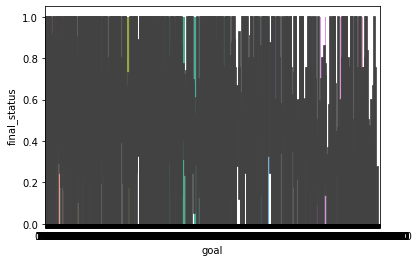

In [32]:

#Dessin d'un bar plot des final_status selon leurs goal
sns.barplot(x="goal", y="final_status", data=train)

print("Percentage de réalisation de projet par rapport au gola inferieur à la moyenne :", train["final_status"][train["goal"] > train['goal'].mean()].value_counts(normalize = True)[1]*100)

print("Percentage de réalisation de projet par rapport au gola superieur à la moyenne:", train["final_status"][train["goal"] < train['goal'].mean()].value_counts(normalize = True)[1]*100)

In [33]:
train['disable_communication'].isna().sum()

0

In [34]:
train['disable_communication'].value_counts()

False    68967
True       155
Name: disable_communication, dtype: int64

In [35]:
train['disable_communication'].value_counts()*100/len(train)

False    99.775759
True      0.224241
Name: disable_communication, dtype: float64

#### Quel impact de backers_count	sur la le statut finale du projet ?

In [36]:
train['backers_count'].isna().sum()

0

#### J'aimerais recuperer les Nan(s) de la colonne backers_count (20%)

In [37]:
import numpy as np
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split




X=train[['goal','disable_communication','deadline','state_changed_at','created_at','launched_at','backers_count','final_status']].dropna(subset=['goal'])
y=X['final_status'].copy()
del X['final_status']
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 0)
#reg = LinearRegression(normalize=True,fit_intercept=True).fit(X, y)
reg = RandomForestClassifier(max_depth=14,n_estimators=50, random_state=0).fit(x_train, y_train) #80%
reg.score(x_val, y_val) #%20


0.8790596745027125

Bon, c'est pas terrible comme accuracy 86,94% mais on va commencer comme cela .Je sauve mon modèle (reg) en format pickle (.pkl)

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val,reg.predict(x_val))

array([[5558, 1217],
       [ 455, 6595]], dtype=int64)

In [42]:
import pickle

# save the model to disk
filename = 'reg_age_model.pkl'
pickle.dump(reg, open(filename, 'wb'))

# load the model from disk
reg = pickle.load(open(filename, 'rb'))
reg

RandomForestClassifier(max_depth=14, n_estimators=50, random_state=0)

In [78]:
pd.qcut(train['goal'], 7)

0               (22500.0, 100000000.0]
1                      (900.0, 2000.0]
2               (22500.0, 100000000.0]
3                    (5000.0, 10000.0]
4               (22500.0, 100000000.0]
                     ...              
69117                 (2000.0, 3500.0]
69118                 (3500.0, 5000.0]
69119    (0.009000000000000001, 900.0]
69120               (10000.0, 22500.0]
69121    (0.009000000000000001, 900.0]
Name: goal, Length: 69122, dtype: category
Categories (7, interval[float64]): [(0.009000000000000001, 900.0] < (900.0, 2000.0] < (2000.0, 3500.0] < (3500.0, 5000.0] < (5000.0, 10000.0] < (10000.0, 22500.0] < (22500.0, 100000000.0]]

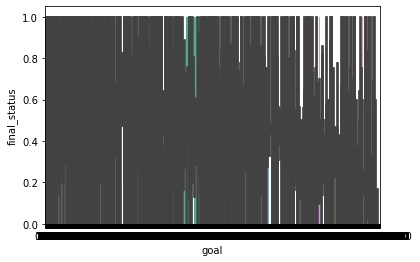

In [79]:
sns.barplot(x="goal", y="final_status", data=train)

Je reprend ce découpage par intervalle que je nomme labels=[]) et essayons d'observer si un label a plus de chance de survie que d'autres

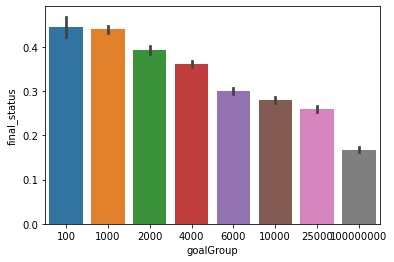

In [38]:
#classer les ages dans catégories
train["goal"] = train["goal"]

bins = [0, 100, 1000, 2000, 4000,  6000, 10000,25000, np.inf]
labels = ['100', '1000', '2000', '4000', '6000', '10000', '25000','100000000']
train['goalGroup'] = pd.cut(train["goal"], bins, labels = labels)

#draw a bar plot of Age vs. survival
sns.barplot(x="goalGroup", y="final_status", data=train)
plt.show()

# Extraction de renseignement sur les autres colonnes du dataset

De maniere plus large, combien y a t il de Nans ?

In [40]:
train.isna().sum()

project_id               0
name                     3
desc                     9
goal                     0
keywords                 0
disable_communication    0
country                  0
currency                 0
deadline                 0
state_changed_at         0
created_at               0
launched_at              0
backers_count            0
final_status             0
goalGroup                0
dtype: int64

Donc on travaille sur Cabin, Embarked pour la gestion des Nan.

Et après, on verra pour extraire de l'info des colonnes Ticket et Name

Notre échantillon d'entrainement est petit, eliminer les Nan et donc la ligne entière reduirait encore plus la taille de notre jeu d'entrainement

In [41]:
nb_occ=train['final_status'].count()

train['final_status'].value_counts()*100/nb_occ

0    68.037252
1    31.962748
Name: final_status, dtype: float64

Comment conserver l'information de la ligne (observation) malgré ces Nan

In [43]:
train.sample(25)

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status,goalGroup
6753,kkst869698680,Ready for Fire in the Pulpit?,Fire in the Pulpit is a feature film that addr...,5000.0,ready-for-fire-in-the-pulpit,False,US,USD,1305466893,1305466895,1301968778,1302010893,3,0,6000
75570,kkst1416485634,Upper Crust Pizza,I make an amazing pizza crust that one person ...,20000.0,upper-crust-pizza,False,US,USD,1412096400,1412096411,1404824598,1407762423,2,0,25000
107023,kkst1302978879,Cuba Life and Passion,A year in the life of the Cuban people before ...,35000.0,cuba-life-and-passion,False,GB,GBP,1432422060,1432422061,1429607964,1430219021,1,0,100000000
90002,kkst2091726955,COMMUTE Art Collective (Canceled),Commute Art Collective is a collection of stud...,50.0,commute-art-collective,False,GB,GBP,1422627102,1420645579,1417887909,1418739102,0,0,100
69588,kkst1508905700,BounceLite: the revolutionary flash diffuser,A next generation flash modifier worthy of bei...,28000.0,bouncelite-the-revolutionary-flash-diffuser,False,GB,GBP,1408725959,1408725959,1402143305,1406133959,310,1,100000000
71109,kkst786072445,Gryphon Knight Epic - Medieval Shmup,Gryphon Knight Epic is a 2D Medieval Shmup tha...,18000.0,gryphon-knight-epic-medieval-shmup,False,US,USD,1409507240,1409507240,1402597416,1406569640,480,1,25000
32705,kkst482788830,"Jim Patton & Sherry Brokus' """"""""""""""""""""""""""""""""""""...",eleven folk/Americana songs about people like ...,14000.0,jim-patton-and-sherry-brokus-the-great-unknown-cd,False,US,USD,1357245103,1357245103,1353536498,1354653103,38,0,25000
24861,kkst1947504979,48 Hour Film Project - Team Drywater,"This year I, along with some friends (and a fe...",160.0,48-hour-film-project-team-drywater,False,US,USD,1343254134,1343254134,1341521571,1342649334,9,1,1000
65144,kkst944859184,2 Tin Bean Cans F#¢king issue #2!,A tale of genetically altered bean cans seekin...,300.0,2-tin-bean-cans-fking-issue-2,False,US,USD,1406675630,1406675630,1403919481,1404083630,29,1,1000
64037,kkst1464763517,"German Subtitles for """"""""""""""""""""""""""""""""""""""""""""""""...",Winfred Rembert doc film “All Me…” invited to ...,5000.0,german-subtitles-for-the-life-and-times-of-win...,False,US,USD,1405703650,1405703650,1401471466,1403111650,93,1,6000


Nous pouvons remplacer ces Nan par une valeur defaut ? Ou essayer de le remplacer par une valeur proche de son profil (qualifier par les autre variables)

# Modélisation / Prédiction

#### Piocher dans la librairie sklearn des modeles de classification (RandomForest, Gradient Boost, LogisticRegression, ...) et realiser plusieurs modeles. Evaluer leur performance via accuracy_score() 

In [44]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

cls=GradientBoostingClassifier().fit(x_train,y_train)

cls.score(x_val,y_val)

0.8733931378895774

In [45]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
cls=RandomForestClassifier(max_depth=12,n_estimators=300).fit(x_train,y_train)

cls.score(x_val,y_val)

0.8731156940719504

In [46]:
from sklearn.linear_model import LogisticRegression
cls=LogisticRegression(max_iter=200).fit(x_train,y_train)

cls.score(x_val,y_val)

0.6844076574493665

In [47]:
# save the model to disk
filename = 'cls_survived.pkl'
pickle.dump(cls, open(filename, 'wb'))

# Creation d'un fichier de soumission Kaggle

#### Transformons egalement notre test !

Pour comparer notre predicteur avec la communauté kaggle, nos devons renvoyer le dataframe test.csv documenté des predictions de survie.

Notre modele etant calé sur un nombre et un typage de colonne precis (celui qui lui a permis de s'entrainer),

Nous devons donc transformer notre dataframe test de la meme façon que nous avons fait pour le train.


==> Regrouper les sequences de transformation par thématiques communes et encapsulez les dans des fonctions.

==> Transformer le fichier test jusqu'a obtenir un fichier totalemnt numérisé (de la meme facon que le train) pour notre modele.

==> Réaliser un model.predict(test) (cf ci dessous)

In [1]:
from scratch_1 import *
import pandas as pd
import numpy as np

In [2]:
test=pd.read_csv('test.csv')
test['Fare'].fillna(0,inplace=True)
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [3]:
test,ind=age_fill_0(test)
test=cabin_handling(test)
test=embarked_hadling(test)
test=name_handling(test)
test=age_fill_1(test,ind)
predict_label(test)

In [ ]:
#Le fichier de soumission contione un colonne passenger ID et une colonne survie ou non
ids = test['PassengerId']
predictions = randomforest.predict(test.drop('PassengerId', axis=1))

#Construction sous format csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission.csv', index=False)

#### Soumettez votre résultat sur https://www.kaggle.com/c/titanic ==> Submit Predictions

### Pour les Devs

Construisez une classe trans heritant de la classe DataFrame et implementer les fonctions de nettoyage/mise_en_forme comme méthodes de ce nouvel objet 